In [6]:
import tensorflow as tf
import os
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [13]:

# Create a directory to store the images
# data_dir = 'D:\AI python\catvsdog\dataset'
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'D:/AI python/catvsdog/dataset/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'D:/AI python/catvsdog/dataset/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [15]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 64)                7

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history =model.fit(train_ds,epochs=10,batch_size=64,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 585s 931ms/step - loss: 0.6110 - accuracy: 0.6747 - val_loss: 0.5389 - val_accuracy: 0.7332
Epoch 2/10
625/625 [==============================] - 1066s 2s/step - loss: 0.4497 - accuracy: 0.7871 - val_loss: 0.5237 - val_accuracy: 0.7620
Epoch 3/10
625/625 [==============================] - 328s 525ms/step - loss: 0.2990 - accuracy: 0.8714 - val_loss: 0.6791 - val_accuracy: 0.7462
Epoch 4/10
625/625 [==============================] - 463s 739ms/step - loss: 0.1576 - accuracy: 0.9390 - val_loss: 0.9098 - val_accuracy: 0.7566
Epoch 5/10
625/625 [==============================] - 436s 698ms/step - loss: 0.0771 - accuracy: 0.9731 - val_loss: 1.3676 - val_accuracy: 0.7496
Epoch 6/10
625/625 [==============================] - 640s 1s/step - loss: 0.0539 - accuracy: 0.9832 - val_loss: 1.2678 - val_accuracy: 0.7598
Epoch 7/10
625/625 [==============================] - 896s 1s/step - loss: 0.0503 - accuracy: 0.9852 - val_loss: 1.4308 - val_acc

In [17]:
import random
def generate_random():
    return random.randint(0,12492)
# print("D:/AI python/catvsdog/dataset/test/dogs/dog.",generate_random(),".jpg",sep='')

1/1 [==============================] - 0s 41ms/step
[[3.0972e-27]]
0
Our model says it is a : dog


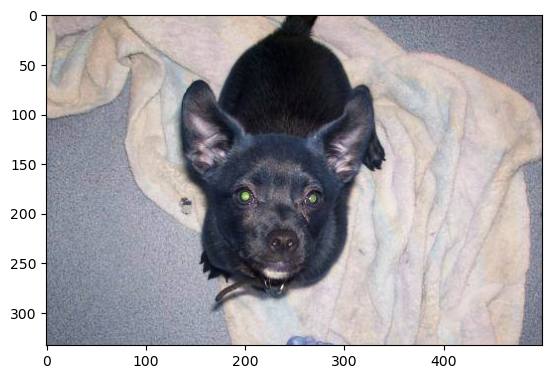

In [30]:
import cv2
import matplotlib.pyplot as plt
try:
    test_img = cv2.imread("D:/AI python/catvsdog/dataset/test/dogs/dog.237.jpg")

    #give the path of image to test.
    # test_img = cv2.imread("D:/AI python/catvsdog/dataset/test/cats/cat.616.jpg")  

    # test_img = cv2.imread("D:/AI python/catvsdog/dataset/test/dogs/dog.",generate_random(),".jpg",sep='')
    # test_img = cv2.imread("D:/AI python/catvsdog/dataset/test/cats/cat.",generate_random(),".jpg",sep='')
    plt.imshow(test_img)
    test_img = cv2.resize(test_img,(256,256))
    test_input = test_img.reshape((1,256,256,3))
    res=model.predict(test_input)
    print(res)
    print(round(res[0][0]))
    if(res[0][0])<0.5:
        pred = 'dog'
    else:
        pred = 'cat'
        
    print("Our model says it is a :", pred)
except Exception as x:
    print("no image found",x)
